In [1]:
### Content

# 1- Libraries
# 2- API Integration
# 3- Download the Files
# 4- Read the Files

# 5- Data Preparation
# 5.1 Drop Unnecessary Columns 
# 5.2 Encoding

# 6- Exploratory Data Analysis
# 6.1- Statistical Analysis
# 6.2- Histograms
# 6.3- Distributions
# 6.4- Scatter-Plotting
# 6.5- Outliers Checking

# 7- Building Model-0 // Benchmark
# 7.1- Logistic Regression

# 8- Data Cleaning
# 8.1- Drop Outliers
# 8.1.1- Balance
# 8.1.2- EstimatedSalary
# 8.2- Standart Scaler

# 9- Building Alternative Models
# 9.1- Model 1 - Decision Trees
# 9.2- Model 2 - Random Forest
# 9.3- Model 3 - Gradient Boosting Machines
# 9.4- Model 4 - xgboost

# 10- Handling Imbalanced Data
# 11- Re-Train Best Performed Model with Balanced Dataset 

# 12- Feature Engineering
# 12.1 Correlation Test
# 12.2 Recursive Feature Elimination

# 13- Hyperparameter Tuning
# 13.1- Grid Search
# 13.2- Random Search

# 14- Cross Validation
# 15- Prediction

### 1- Libraries

In [4]:
### 1- Libraries

# Data Manipulation and Cleaning Libraries
import pandas as pd  # For data manipulation and data frames
import numpy as np  # For numerical operations and arrays

# File and System Operations Libraries
import os  # For operating system interactions, like file handling
import sys
import zipfile  # For working with zip files

# Dataset Access Libraries
from kaggle.api.kaggle_api_extended import KaggleApi  # For accessing datasets from Kaggle
from config import *  # Importing custom configurations
from model_eval_func import *  # Custom model evaluation functions

# Data Visualization Libraries

# Machine Learning Libraries


### 2- API

In [5]:
# Kaggle API
api = KaggleApi()
api.authenticate()

competition = comp
api.competition_download_files(competition, path=path_1)


### 3- Download the Files

In [6]:
# Download the file
zip_file_path = os.path.join(path_1, 'sberbank-russian-housing-market.zip')  # Burada dosya adını doğru şekilde belirtin

# Extract the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(path_1)

print(f"Zip Files Saved...")

Zip Files Saved...


### 4- Read the Files

In [7]:
# Raw data klasörünün yolu
raw_data_directory = path_1

In [8]:
# Klasörün içindeki dosyaları listeleme
if os.path.exists(path_1) and os.path.isdir(path_1):
    files = os.listdir(path_1)
    print("Files in the Raw Folder:")
    print(" ")
    for file in files:
        print(file)
else:
    print("Belirtilen klasör yok veya bir dizin değil.")

Files in the Raw Folder:
 
data_dictionary.txt
macro.csv.zip
sample_submission.csv.zip
sberbank-russian-housing-market.zip
test.csv.zip
train.csv.zip


In [14]:
# Klasördeki dosyaları listele
files = os.listdir(path_1)

print("Dataframes: ")
print("")

# Read only the test and train CSV files and save them as variables
for file in files:
    if file.endswith('.zip'):
        file_path = os.path.join(path_1, file)
        
        # Open the zip file
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            # List files inside the zip
            zip_files = zip_ref.namelist()
            for zip_file in zip_files:
                if zip_file.endswith('.csv') and ('test' in zip_file or 'train' in zip_file):
                    # Read the CSV file inside the zip
                    with zip_ref.open(zip_file) as csv_file:
                        # Try different encoding options
                        try:
                            df = pd.read_csv(csv_file, encoding='utf-8')
                        except UnicodeDecodeError:
                            try:
                                df = pd.read_csv(csv_file, encoding='latin1')
                            except pd.errors.EmptyDataError:
                                print(f"EmptyDataError: No columns to parse from file {zip_file}")
                                continue
                            except Exception as e:
                                print(f"Unexpected error while reading {zip_file}: {e}")
                                continue
                        except pd.errors.EmptyDataError:
                            print(f"EmptyDataError: No columns to parse from file {zip_file}")
                            continue
                        except Exception as e:
                            print(f"Unexpected error while reading {zip_file}: {e}")
                            continue

                        # Determine variable name using the file name
                        var_name = os.path.splitext(zip_file)[0] + '_df'
                        
                        # Save the DataFrame using globals() function
                        globals()[var_name] = df
                        
                        print(f"{var_name} saved...")

Dataframes: 

test_df saved...
EmptyDataError: No columns to parse from file __MACOSX/._test.csv
train_df saved...
EmptyDataError: No columns to parse from file __MACOSX/._train.csv


### 5- Data Preperation

In [10]:
# Read the dataframes



#### 5.1 Drop Unnecessary Columns 

#### 5.2 Encoding

### 6- Exploratory Data Analysis

In [17]:
# Check datatype and blanks
df_2.info()
df_2.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  int32  
 2   Gender           165034 non-null  int32  
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int32(2), int64(4)
memory usage: 12.6 MB


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,627,0,1,33.0,1,0.0,2,1.0,1.0,49503.50,0


#### 6.1- Statistical Analysis

In [18]:
# Statistical Distribution
df_2.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,0.648545,0.564429,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,0.816574,0.495833,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,0.000000,1.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,1.000000,1.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


#### 6.2- Histograms

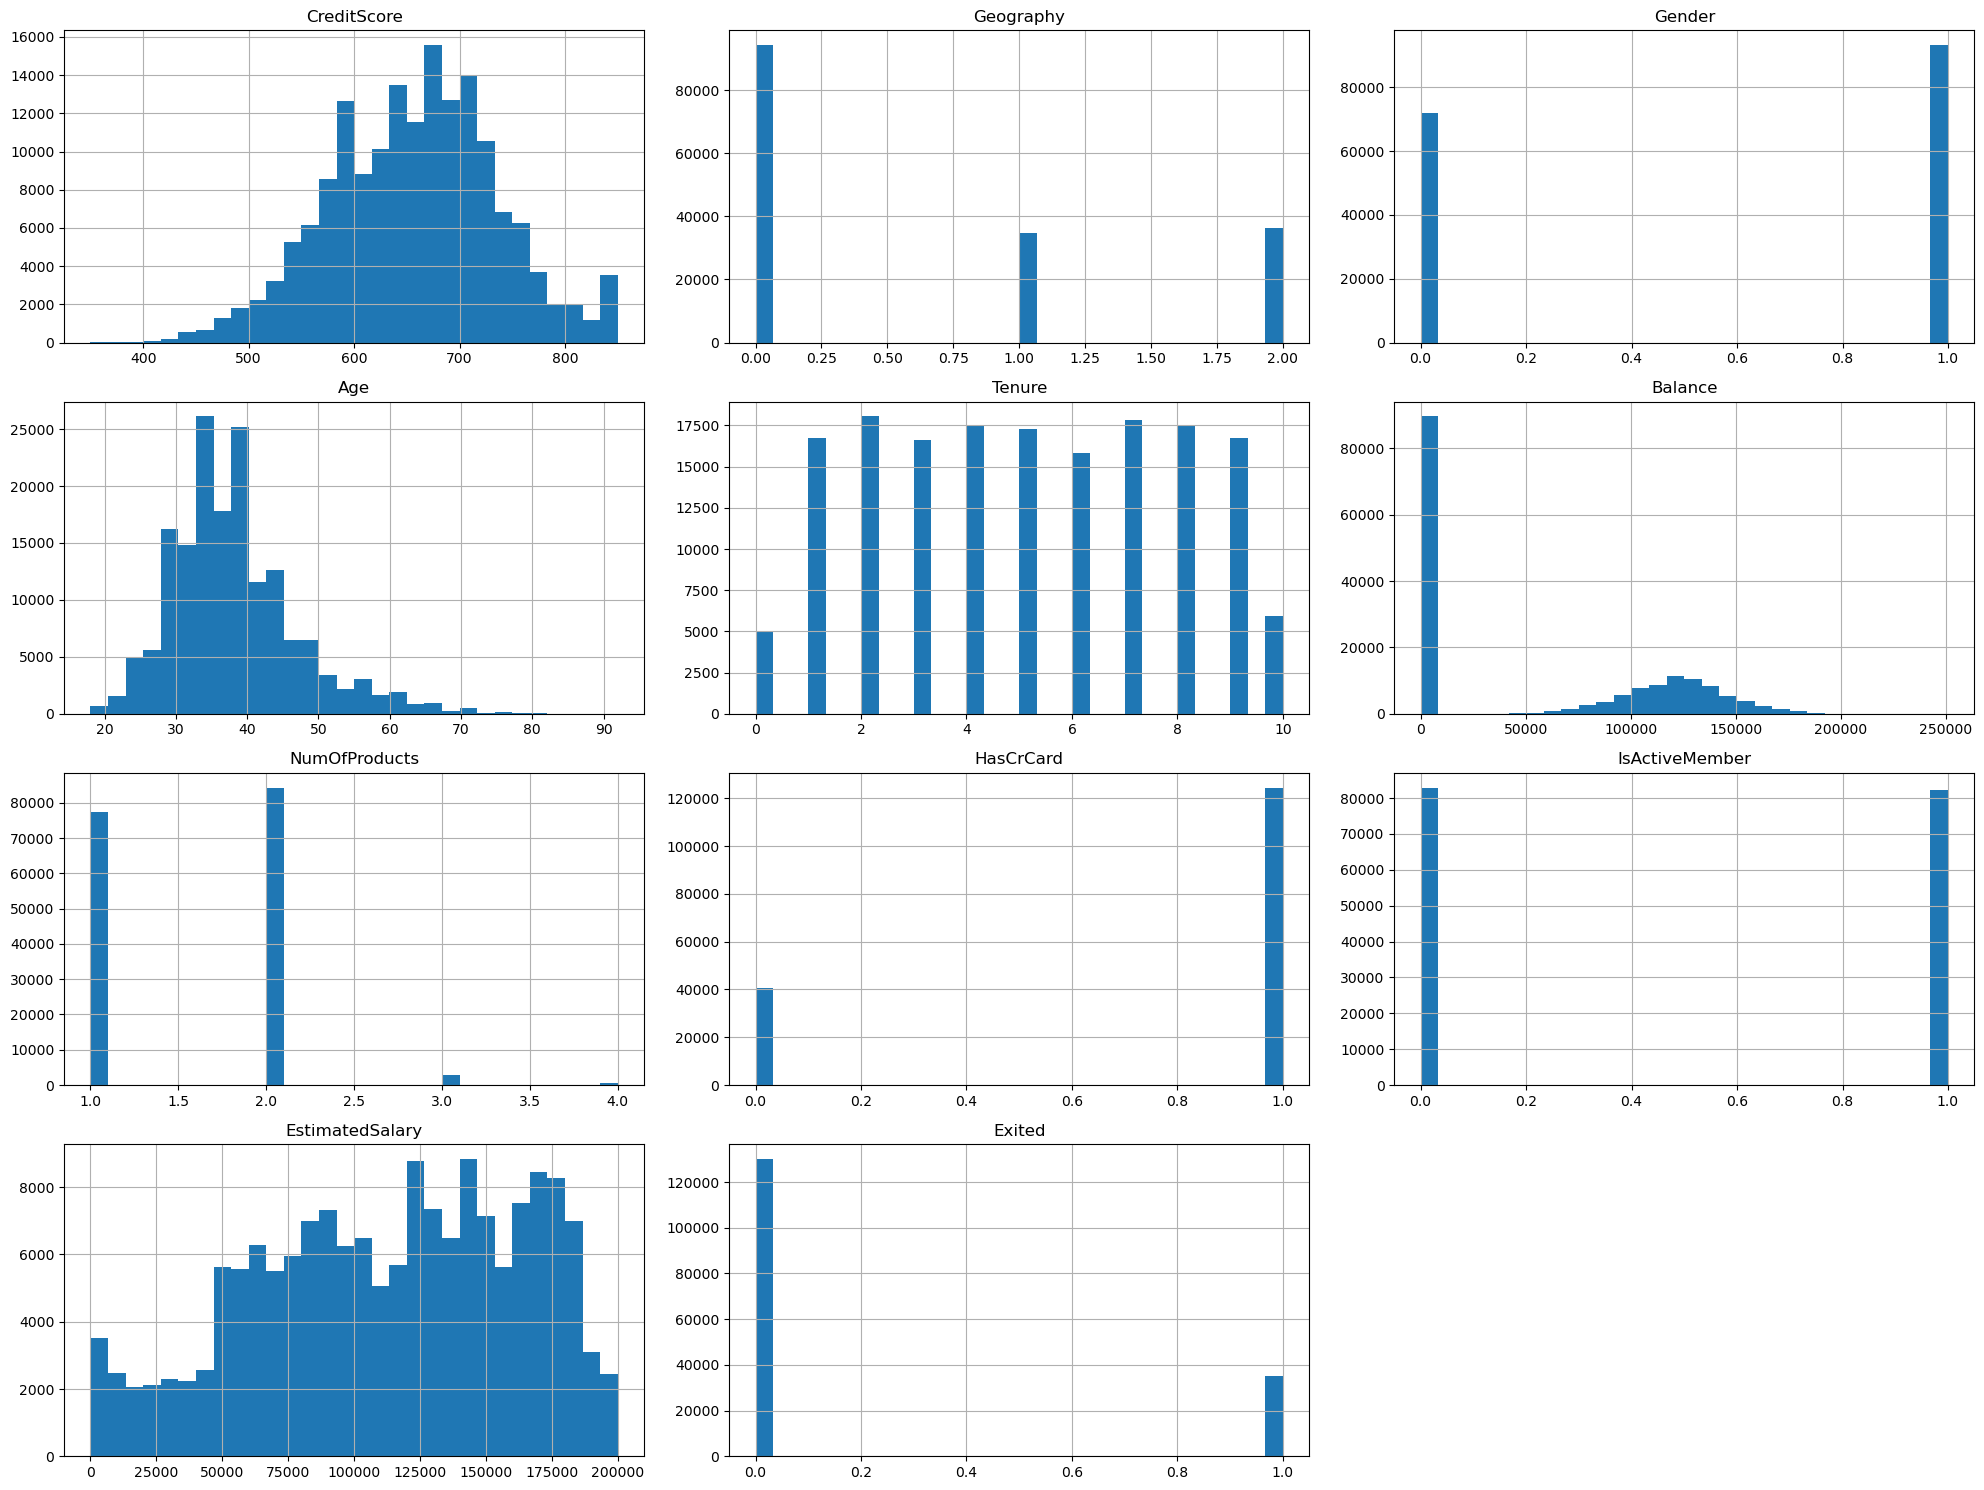

In [20]:
# Histograms
df_2.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

#### 6.3- Distributions

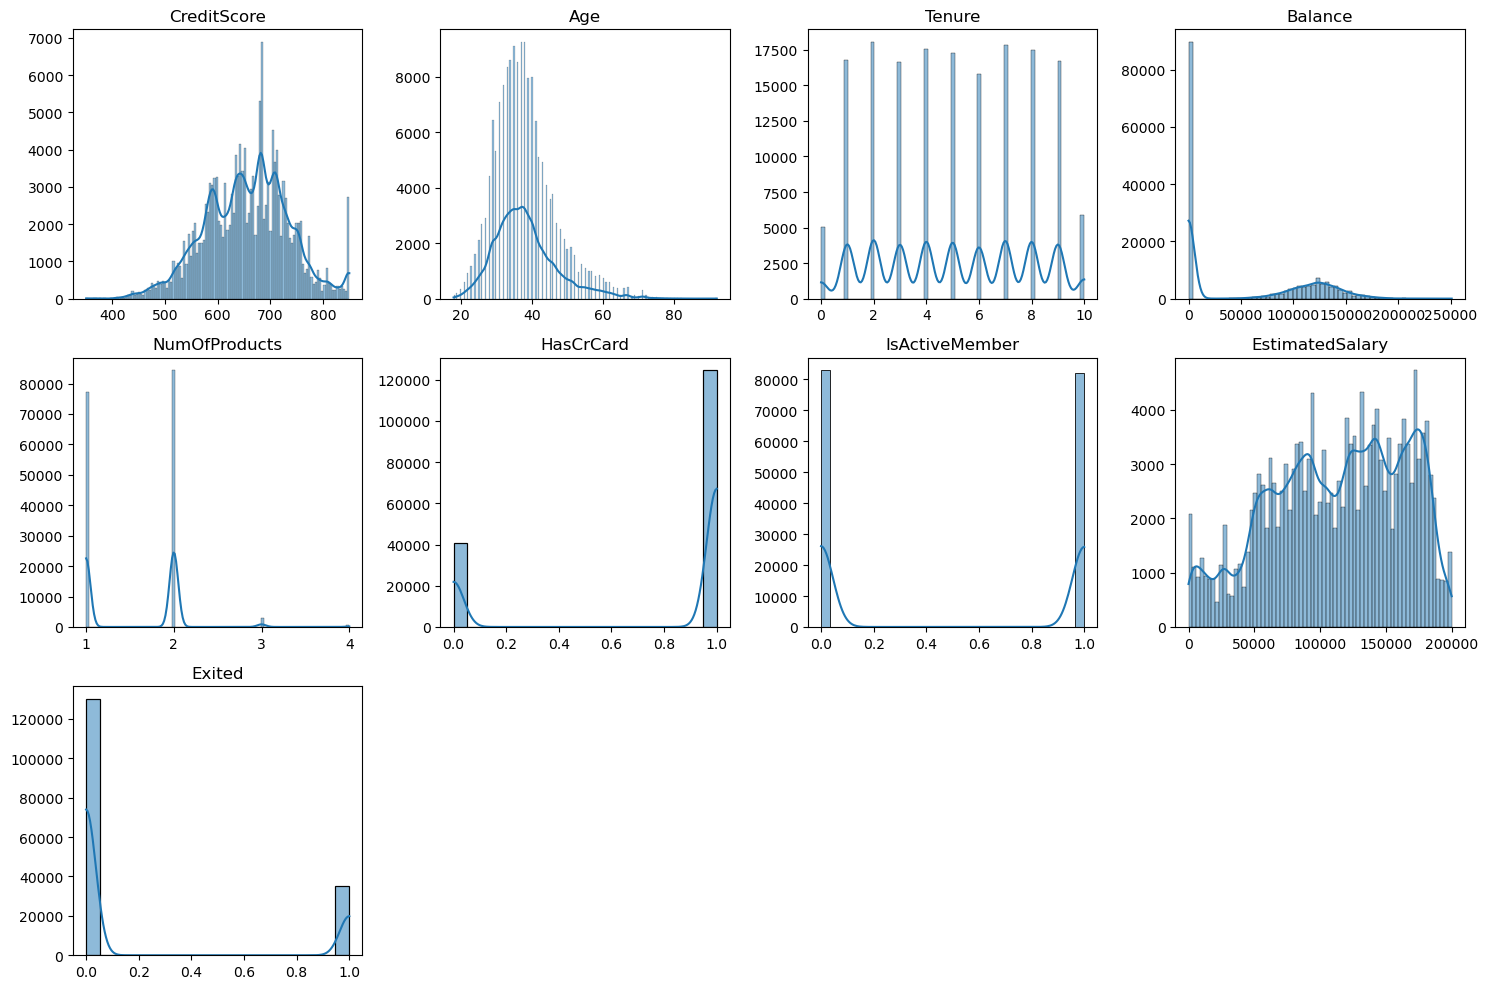

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_2 is your DataFrame
numeric_columns = df_2.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))  # Adjusting the size to accommodate all subplots

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Adjust the number of rows and columns if necessary
    sns.histplot(df_2[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


#### 6.4- Scatter-Plotting

#### 6.5- Outliers Checking

### 7- Building Model-0 // Benchmark

#### 7.1- Logistic Regression

### 8- Data Cleaning

#### 8.1- Drop Outliers

##### 8.1.1- Balance

##### 8.1.2- EstimatedSalary

#### 8.2- Standart Scaler

### 9- Building Alternative Models

#### 9.1- Model 1 - Decision Trees

#### 9.2- Model 2 - Random Forest

#### 9.3- Model 3 - Gradient Boosting Machines

#### 9.4- Model 4 - xgboost

#### 10- Handling Imbalanced Data

#### 11- Re-Train Models with Balanced Dataset 

### 12- Feature Engineering

#### 12.1 Correlation Test

#### 12.2 Recursive Feature Elimination

### 13- Hyperparameter Tuning

#### 13.1- Grid Search

#### 13.2- Random Search

### 14- Cross Validation